In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
from numpy import linalg as LA
from sklearn.mixture import GaussianMixture

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Code for getting accuracies and loss for Kmeans and GMM

(300, 2)
Sum of Scores:  17.857541360170416
kmeans accuracy
22 15 28 0.7833333333333333
gmm accuracy
15 11 42 0.7733333333333333


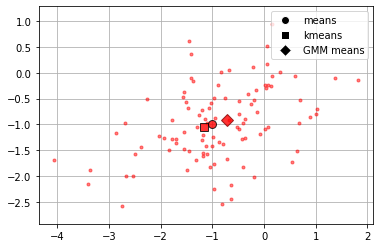

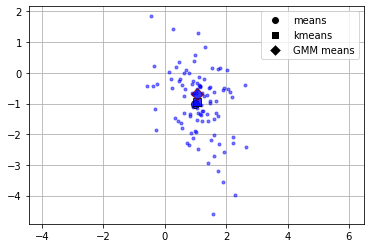

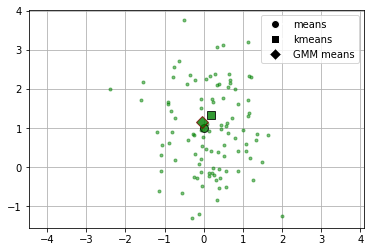

(300, 2)
Sum of Scores:  10.637769960209722
kmeans accuracy
34 18 25 0.7433333333333333
gmm accuracy
41 19 20 0.7333333333333333


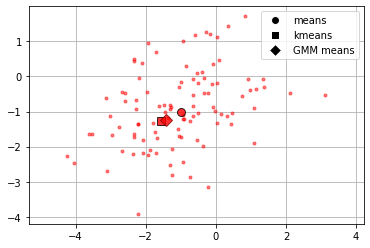

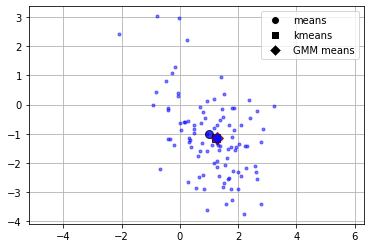

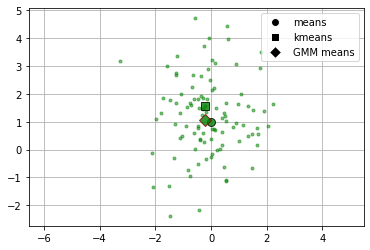

(300, 2)
Sum of Scores:  6.235513925682675
kmeans accuracy
48 36 46 0.5666666666666667
gmm accuracy
50 34 47 0.5633333333333334


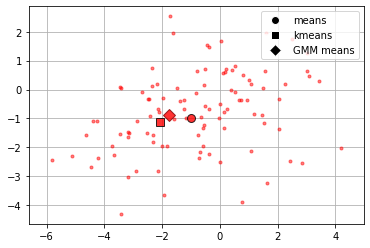

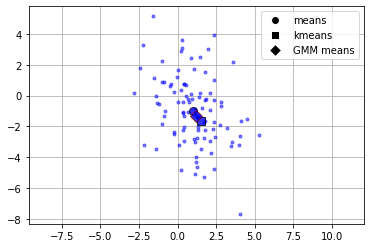

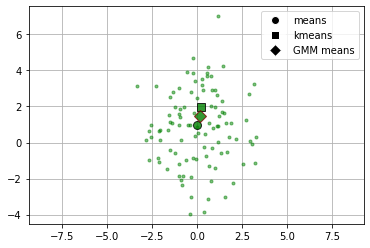

(300, 2)
Sum of Scores:  3.8776922528821127
kmeans accuracy
46 57 44 0.51
gmm accuracy
37 56 69 0.46


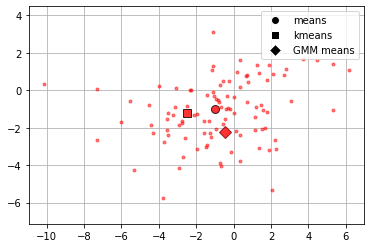

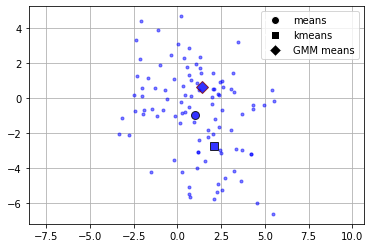

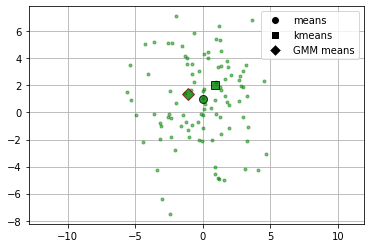

(300, 2)
Sum of Scores:  2.0976989631300715
kmeans accuracy
52 48 45 0.5166666666666667
gmm accuracy
33 55 49 0.5433333333333333


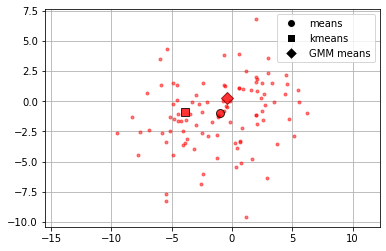

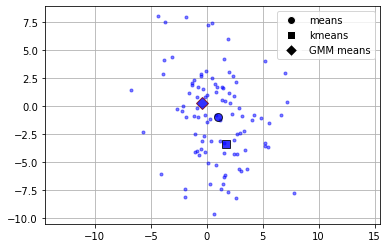

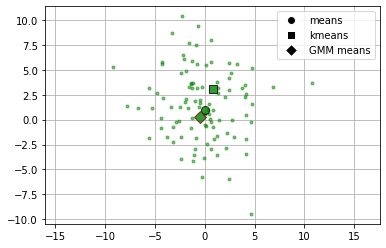

In [10]:
sigmas = [0.5, 1, 2, 4, 8]
means = np.array([[-1, -1],[1, -1], [0,1]])
#array to hold accuracy and SSEs for each run (sum of the squared Euclidean distances)
sse = []
acc = []
gacc = []
gscores = []
iterations=[]
color1=['red','blue','green']
color2 = ['orange', 'cyan', 'lightgreen']
for sigma in sigmas:
    clusterIndex = []
    gclusterIndex = []
    # get distributions + dataset
    kernela = np.array([[2, 0.5],[0.5,1]])
    kernela = sigma * kernela
    pa = np.random.multivariate_normal([-1,-1], kernela, 100)
    
    kernelb = np.array([[1, -0.5],[-0.5, 2]])
    kernelb = sigma * kernelb
    pb = np.random.multivariate_normal([1,-1], kernelb, 100)
    
    kernelc = np.array([[1, 0],[0, 2]])
    kernelc = sigma * kernelc
    pc = np.random.multivariate_normal([0,1], kernelc, 100)
    
    data_orig = np.concatenate((pa,pb,pc), 0)
    dataset = np.concatenate((pa,pb,pc), 0)
    np.random.shuffle(dataset)      
    print(dataset.shape)
    
    
    # K means
    kmeans = KMeans(
            init="k-means++",
            n_clusters=3,
            n_init=10,
            max_iter=300, 
            random_state=200  
    ).fit(dataset)
    labels = kmeans.predict(data_orig)
    gm = GaussianMixture(n_components=3, random_state=123,n_init=50)
    gm_preds = gm.fit_predict(data_orig)
    log_probs = gm.score_samples(data_orig) 
    sum_of_scores = (np.exp(log_probs)).sum()
    probs = np.exp(log_probs) / sum_of_scores
    #print ("Log Probabilities of each sample", log_probs)
    print('Sum of Scores: ', sum_of_scores)
    gscores.append(sum_of_scores)
    
    #score
    sse.append(kmeans.inertia_)
    iterations.append(kmeans.n_iter_)


    #find the cluster centriods that map to pa, pb and pc dataset. 
    #use this index to identify the labels belonging to pa, pb, pc dataset
    for i in range(0,3):
        dist = LA.norm(kmeans.cluster_centers_-means[i], axis=1)
        clusterIndex.append(np.argmin(dist))
        dist = LA.norm(gm.means_-means[i], axis=1)
        gclusterIndex.append(np.argmin(dist))
    
    # get the count of labels that do not belong to the group. These are mispredictions
    labelset1 = labels[0:100]
    labelset2 = labels[100:200]
    labelset3 = labels[200:300]
    erra = len(labelset1[labelset1 != clusterIndex[0]])
    errb = len(labelset1[labelset2 != clusterIndex[1]])
    errc = len(labelset1[labelset3 != clusterIndex[2]])

    accuracyt = (300 -(erra+errb+errc))/300
    print("kmeans accuracy")
    print(erra, errb, errc, accuracyt)
    acc.append(accuracyt)

    glabelset1 = gm_preds[0:100]
    glabelset2 = gm_preds[100:200]
    glabelset3 = gm_preds[200:300]
    erra = len(glabelset1[glabelset1 != gclusterIndex[0]])
    errb = len(glabelset1[glabelset2 != gclusterIndex[1]])
    errc = len(glabelset1[glabelset3 != gclusterIndex[2]])

    accuracyt = (300 -(erra+errb+errc))/300
    print("gmm accuracy")
    print(erra, errb, errc, accuracyt)
    gacc.append(accuracyt)



    for i in range(0,3):
        plt.plot(data_orig[i*100:(i+1)*100, 0], data_orig[i*100:(i+1)*100, 1], '.',c=color1[i], alpha=0.5)
        plt.plot(means[i][0], means[i][1], marker="o", markersize=8, markeredgecolor="black",
               markerfacecolor=color1[i], alpha=0.8, label="Means")
        ct_x= kmeans.cluster_centers_[clusterIndex[i]][0]
        ct_y= kmeans.cluster_centers_[clusterIndex[i]][1]
        plt.plot(ct_x, ct_y, marker="s", markersize=8, markeredgecolor="black",
               markerfacecolor=color1[i], alpha=0.8, label="Kmeans")
        ct_x= gm.means_[gclusterIndex[i]][0]
        ct_y= gm.means_[gclusterIndex[i]][1]
        plt.plot(ct_x, ct_y, marker="D", markersize=8, markeredgecolor="maroon",
               markerfacecolor=color1[i], alpha=0.8, label="GMM means")
      
        legend_elements = [Line2D([0], [0], marker='o', color='w', label='means',
                       markerfacecolor='black', markersize=8),
                       Line2D([0], [0], marker='s', color='w', label='kmeans',
                          markerfacecolor='black', markersize=8),
                        Line2D([0], [0], marker='D', color='w', label='GMM means',
                          markerfacecolor='black', markersize=8)
                      ]
        plt.legend(handles=legend_elements,loc="upper right")
        plt.axis('equal')
        plt.grid()

        plt.show()


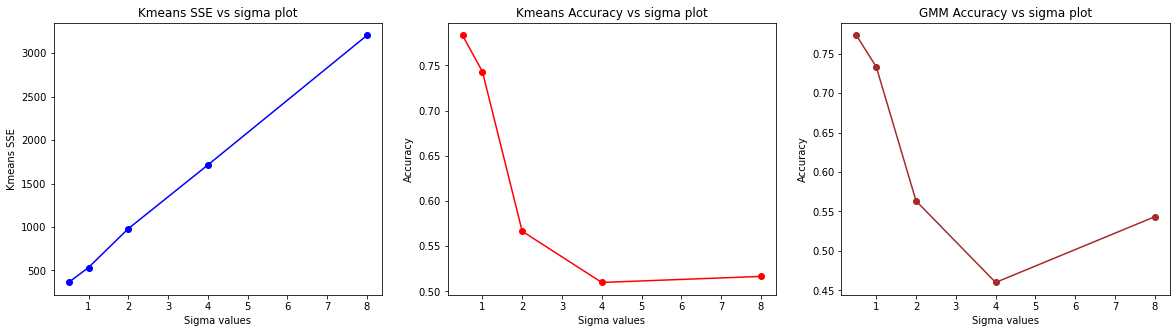

In [11]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(sigmas, sse, marker='o', color = 'blue')
plt.title('Kmeans SSE vs sigma plot')
plt.ylabel('Kmeans SSE')
plt.xlabel('Sigma values')
plt.subplot(1, 3, 2)
plt.plot(sigmas, acc, marker='o',color = 'red')
plt.title('Kmeans Accuracy vs sigma plot')
plt.ylabel('Accuracy')
plt.xlabel('Sigma values')

plt.subplot(1, 3, 3)
plt.plot(sigmas, gacc, marker='o',color = 'brown')
plt.title('GMM Accuracy vs sigma plot')
plt.ylabel('Accuracy')
plt.xlabel('Sigma values')
plt.show()

# Plots

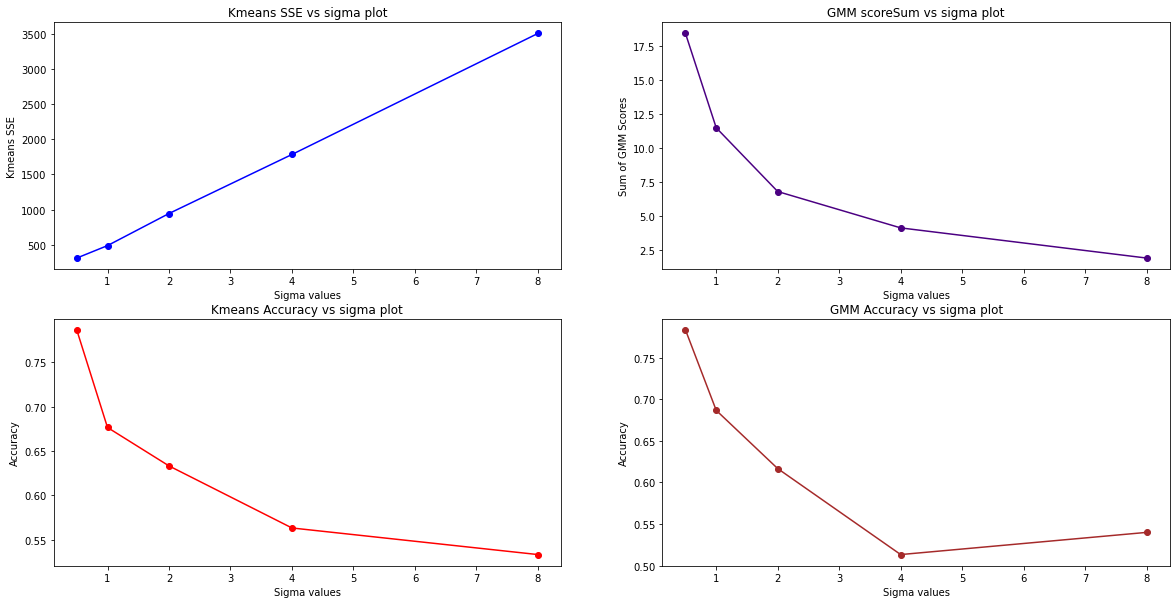

In [8]:
plt.subplots(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(sigmas, sse, marker='o', color = 'blue')
plt.title('Kmeans SSE vs sigma plot')
plt.ylabel('Kmeans SSE')
plt.xlabel('Sigma values')

plt.subplot(2, 2, 2)
plt.plot(sigmas, gscores, marker='o',color = 'indigo')
plt.title('GMM scoreSum vs sigma plot')
plt.ylabel('Sum of GMM Scores')
plt.xlabel('Sigma values')

plt.subplot(2, 2, 3)
plt.plot(sigmas, acc, marker='o',color = 'red')
plt.title('Kmeans Accuracy vs sigma plot')
plt.ylabel('Accuracy')
plt.xlabel('Sigma values')


plt.subplot(2, 2, 4)
plt.plot(sigmas, gacc, marker='o',color = 'brown')
plt.title('GMM Accuracy vs sigma plot')
plt.ylabel('Accuracy')
plt.xlabel('Sigma values')
plt.show()